# Don't look at this notebook unless you are finding weird phase unwrapping result!

# In this script, 'raw', a time series of dihedral values with range [-180,180]or [0,360] will be processed to give 'con', a time series that is as continuous as possible.

# People call this problem "Phase unwrapping" and it is nontrivial for realistic data. Its uncertainty should be higher when time difference between two MD trajactory frames become higher.

# First, let's make an artificial time series that looks very bad if plotted without processing:

[-179.8946718   175.29014773  177.86578884 ...,  168.62563079  172.24633083
  166.80156495]


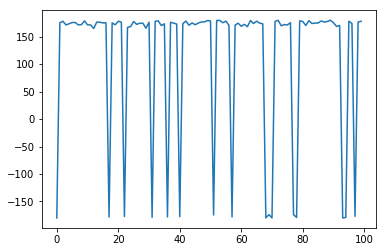

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

raw = (np.random.normal(175, 5, 100000) + 180 ) % 360 - 180
print (raw)
plt.plot(raw[0:100])

##  I wrote some code based on https://www.ljmu.ac.uk/~/media/files/ljmu/about-us/faculties-and-schools/tae/geri/onedimensionalphaseunwrapping_finalpdf to do phase unwrapping

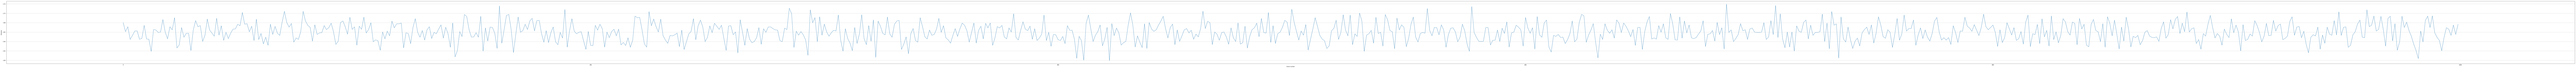

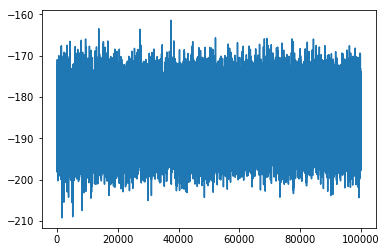

In [3]:
con = np.copy(raw)
for i in range(1,raw.size): 
    diff=con[i]-con[i-1]
    if diff > 180:
        con[i:] -= 360
    elif diff < -180:
        con[i:] += 360 

plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(400,10))
plt.plot(con[0:1000])
plt.xlabel('frame number')
plt.ylabel('Dihedral')
plt.grid(True,axis='y')
plt.show()

plt.plot(con)
plt.show()

The code is giving expected correct result!
# Now let's try real data:

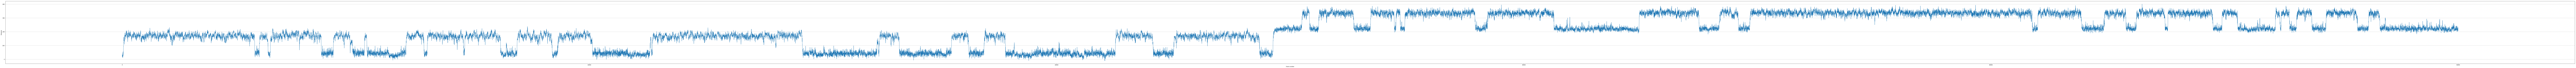

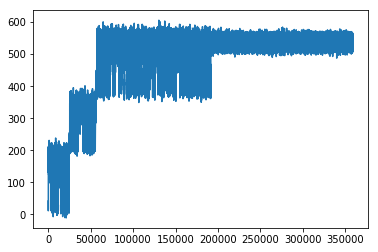

In [11]:
filename = "/home/winter/onsager/r5test.dih"
raw = np.genfromtxt(filename, delimiter=' ', skip_header=1, skip_footer=0)

con = np.copy(raw)
for i in range(1,raw.size): 
    diff=con[i]-con[i-1]
    if diff > 180:
        con[i:] -= 360
    elif diff < -180:
        con[i:] += 360 

plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(400,10))
plt.plot(con[0:50000])
plt.xlabel('frame number')
plt.ylabel('Dihedral')
plt.grid(True,axis='y')
plt.show()

plt.plot(con)
plt.show()

It's also doing good! Currently I can't reproduce the erroneous behaviour I saw before. Maybe I fixed it somehow but didn't write down that I fixed it.